# QNLP Assignment: VII Sem

This is the assignment for the Quantum Natural Language Processing understanding. This Assignment is done by the following team:
1. Suyash Nishikant Kamble - 20bds029
2. Jasmeet Singh Pothiwal - 20bds041
3. Abhishek Shridhar Mane - 20bds001
4. Rishabh Singh - 20bds044

This in-depth exploration unveils the world of Quantum Natural Language Processing (QNLP), employing the dynamic trio of the lambeq library, PyTorch, and PennyLane. The QNLP journey encompasses a series of pivotal stages, commencing with data input and preprocessing. Here, sentences undergo a transformative journey, evolving into intricate string diagrams, undergoing simplification, and finally metamorphosing into quantum circuits via the IQPAnsatz method. At the apex of this innovation lies the XORSentenceModel, a hybrid QNLP marvel. This model seamlessly fuses quantum circuits with a neural network, wielding the power to discern the thematic relevance between pairs of sentences.

The architecture of the QNLP model undergoes a meticulous shaping process, intricately molded by the grammatical composition of the input sentence. At the forefront of this linguistic journey stands lambeq, orchestrating the symphony with its adept parsing mechanism. In its latest rendition, lambeq proudly introduces Bobcat, a neural network-driven parser of remarkable sophistication, while also broadening its horizons by harmonizing with an array of other parsers.

As the parsing phase gracefully concludes, lambeq embarks on crafting a syntax tree for the sentence, a masterpiece that seamlessly metamorphoses into an abstract entity known as a "string diagram." This intricate representation gracefully encapsulates the intricate web of linguistic relationships concealed within the sentence's tapestry. Remarkably, this transformative step operates independently of the nitty-gritty technical details, ensuring its seamless integration into the intricate fabric of training procedures.

To illustrate this multifaceted process, allow us to introduce the debut of a hybrid marvel, aptly named PennyLaneModel. The very essence of this model's existence is to embark on the noble quest of discerning whether a given pair of sentences intertwines with divergent themes. To attain this lofty goal, we enlist the formidable might of the IQPAnsatz, a versatile tool adept at transmuting string diagrams into intricate quantum circuits. It's noteworthy that these circuits gracefully transition into the realm of PennyLane, undergoing an automated metamorphosis as they are entrusted to the model's discerning intelligence.

In [ ]:
 !pip install lambeq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.1/152.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.9/144.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.3/364.3 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 90.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.9 MB/s eta 0:00:00


In [ ]:
from lambeq import SpacyTokeniser

tokeniser = SpacyTokeniser()
sentence = "We have very small semester this time"
tokens = tokeniser.tokenise_sentence(sentence)
tokens

['We', 'have', 'very', 'small', 'semester', 'this', 'time']

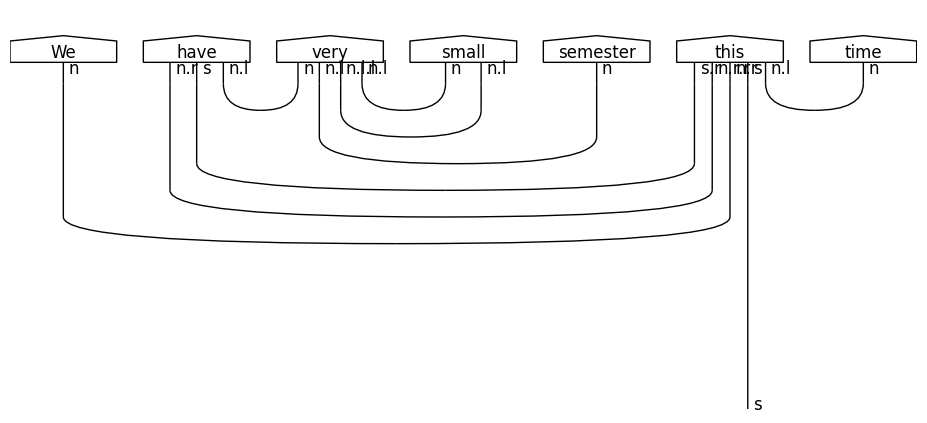

In [ ]:
from lambeq import BobcatParser, pregroups

parser = BobcatParser(verbose='suppress')
diagram = parser.sentence2diagram(tokens, tokenised=True)

pregroups.draw(diagram, figsize=(23,4), fontsize=12)

In [ ]:
sentences = ["This is a sentence.", "This is (another) sentence!"]

tok_sentences = tokeniser.tokenise_sentences(sentences)
tok_sentences

[['This', 'is', 'a', 'sentence', '.'],
 ['This', 'is', '(', 'another', ')', 'sentence', '!']]

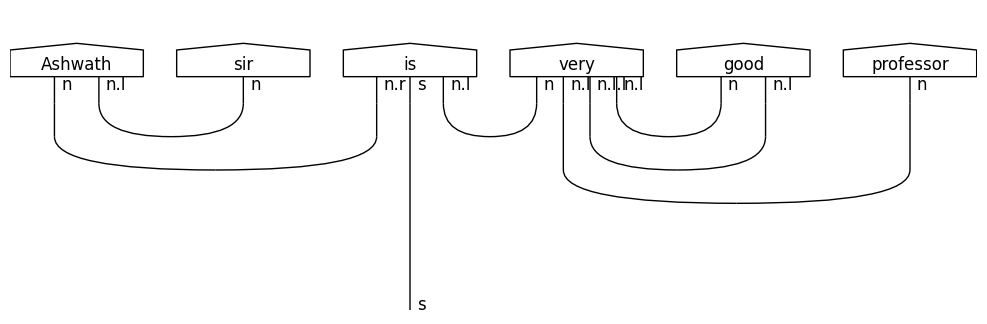

In [ ]:
from lambeq import BobcatParser, pregroups

sentence = 'Ashwath sir is very good professor'

# Parse the sentence and convert it into a string diagram
parser = BobcatParser(verbose='suppress')
diagram = parser.sentence2diagram(sentence)

pregroups.draw(diagram, figsize=(14,3), fontsize=12)

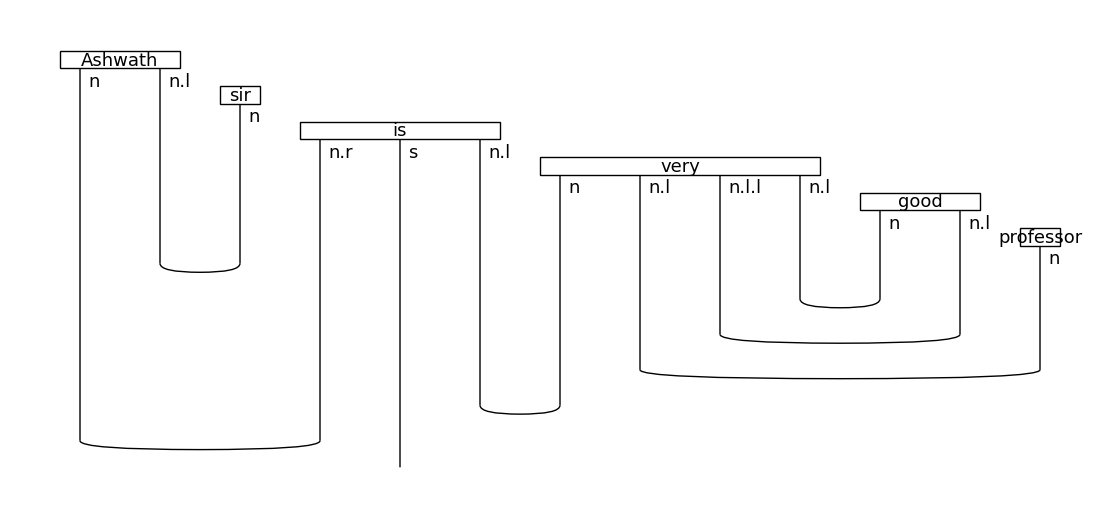

In [ ]:

# Parse the sentence
parser = BobcatParser(verbose='suppress')
diagram = parser.sentence2diagram("Ashwath sir is very good professor")

diagram.draw(figsize=(11,5), fontsize=13)

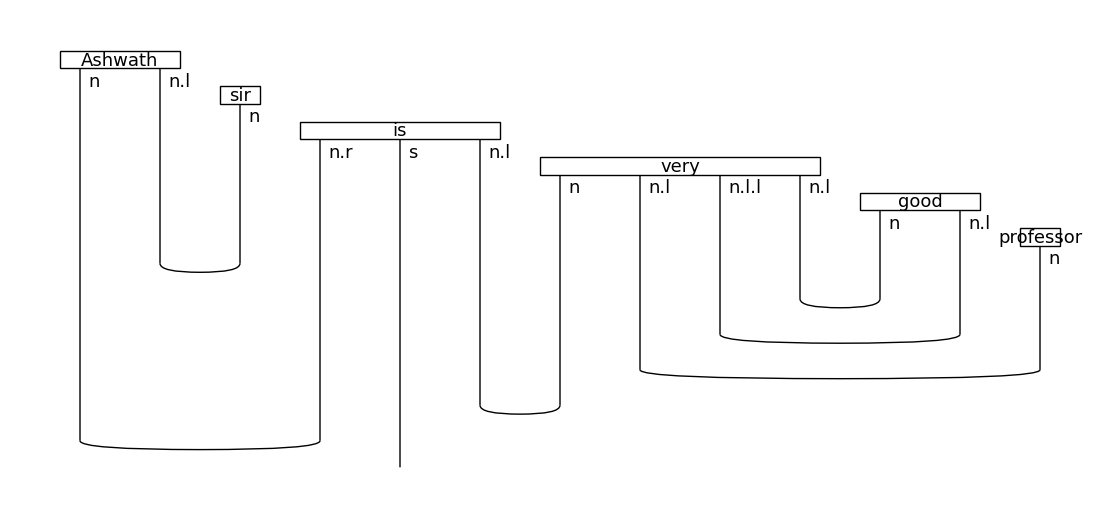

In [ ]:
from lambeq import Rewriter

# Apply rewrite rule for prepositional phrases

rewriter = Rewriter(['prepositional_phrase', 'determiner'])
rewritten_diagram = rewriter(diagram)

rewritten_diagram.draw(figsize=(11,5), fontsize=13)

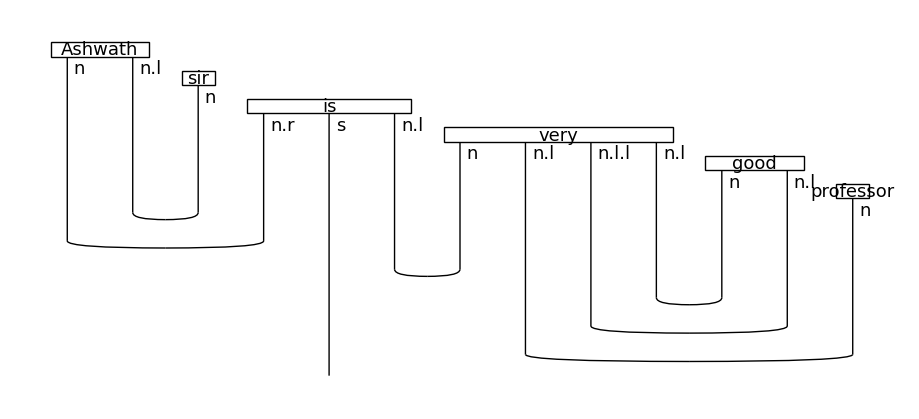

In [ ]:
normalised_diagram = rewritten_diagram.normal_form()
normalised_diagram.draw(figsize=(9,4), fontsize=13)

In [ ]:
sentence = 'Ashwath sir is very good professor'

# Get a string diagram
parser = BobcatParser(verbose='text')
diagram = parser.sentence2diagram(sentence)

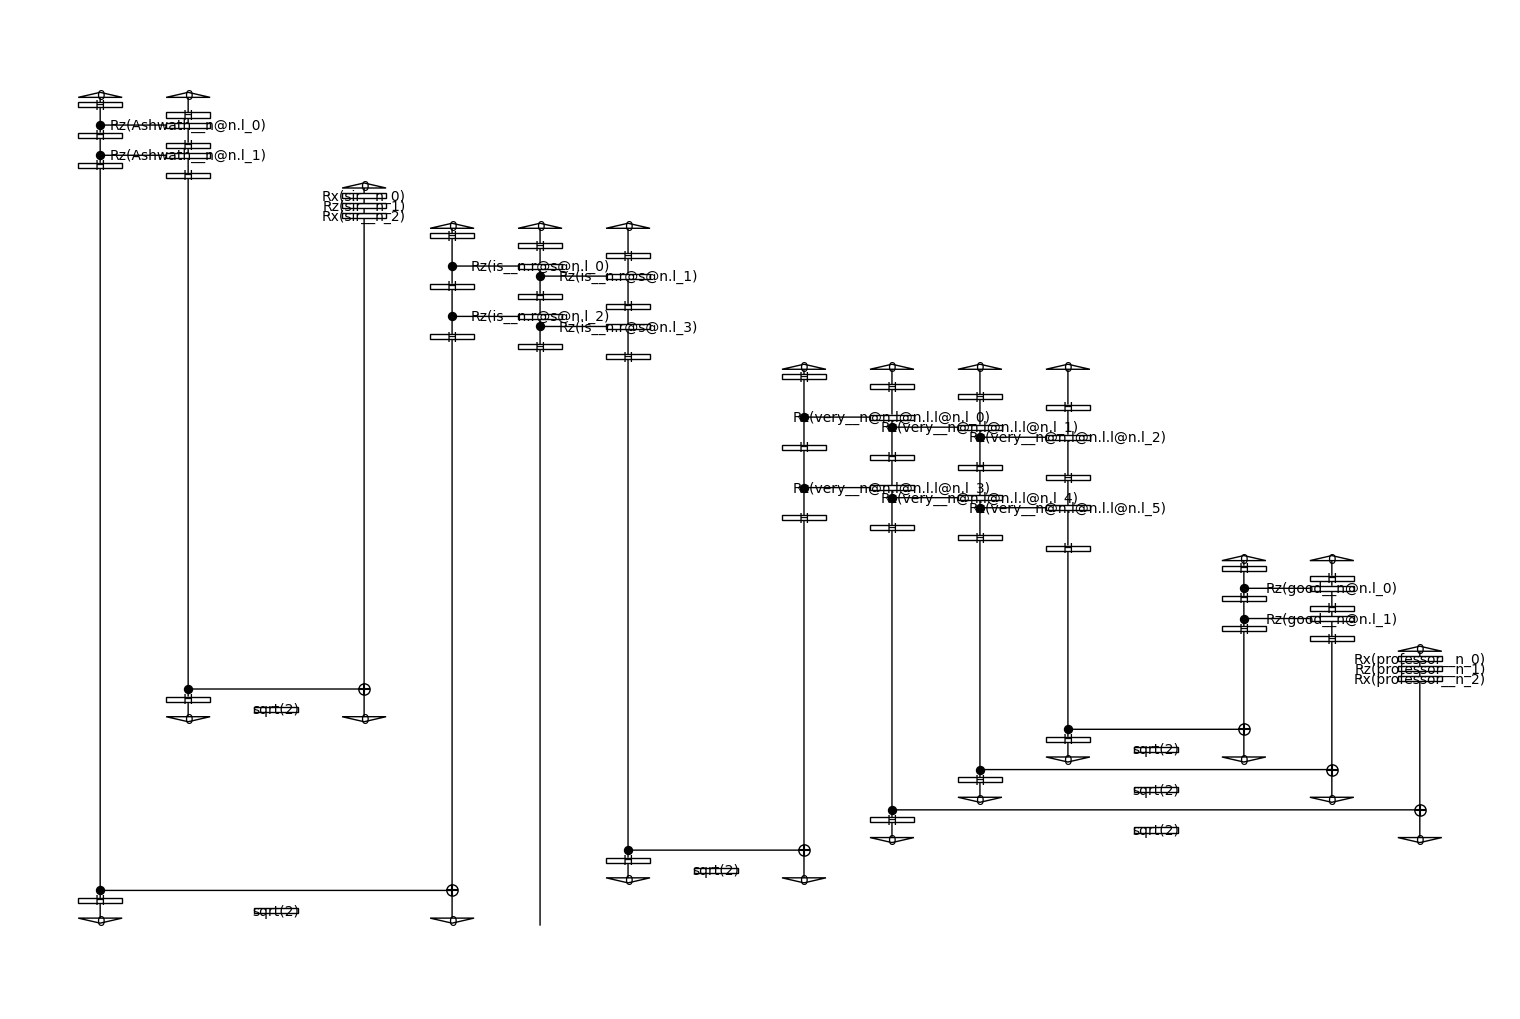

In [ ]:
from lambeq import AtomicType, IQPAnsatz

# Define atomic types
N = AtomicType.NOUN
S = AtomicType.SENTENCE

# Convert string diagram to quantum circuit
ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=2)
discopy_circuit = ansatz(diagram)
discopy_circuit.draw(figsize=(15,10))

In [ ]:
from pytket.circuit.display import render_circuit_jupyter

tket_circuit = discopy_circuit.to_tk()

render_circuit_jupyter(tket_circuit)

In [ ]:
!pip install pytket-qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.4/130.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.9/242.9 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 28.2 MB/s eta 0:00:00
  Installing build dependencies ...

In [ ]:
from pytket.extensions.qiskit import tk_to_qiskit

qiskit_circuit = tk_to_qiskit(tket_circuit)

In [ ]:
import torch

BATCH_SIZE = 30
EPOCHS = 30
LEARNING_RATE = 3e-2
SEED = 0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def read_data(filename):
    labels, sentences = [], []
    with open(filename) as f:
        for line in f:
            line = line.split(',')
            labels.append(int(line[2]))
            sentences.append((line[0], line[1]))
    return labels, sentences

train_labels, train_data = read_data('/content/drive/MyDrive/data/QNLP/mc_pair_dev_data.csv')
dev_labels, dev_data = read_data('/content/drive/MyDrive/data/QNLP/mc_pair_dev_data.csv')
test_labels, test_data = read_data('/content/drive/MyDrive/data/QNLP/mc_pair_test_data.csv')

print(list(zip(train_data[:5], train_labels[:5])))

[(('man bakes sauce .', 'skillful woman runs software .'), 0), (('man runs program .', 'skillful person prepares sauce .'), 0), (('man prepares tasty sauce .', 'man debugs application .'), 0), (('woman prepares software .', 'woman cooks sauce .'), 0), (('skillful woman prepares application .', 'woman prepares useful application .'), 1)]


In [ ]:
train_data_l, train_data_r = zip(*train_data)
train_data_unpaired = list(train_data_l) + list(train_data_r)
dev_data_l, dev_data_r = zip(*dev_data)
dev_data_unpaired = list(dev_data_l) + list(dev_data_r)
test_data_l, test_data_r = zip(*test_data)
test_data_unpaired = list(test_data_l) + list(test_data_r)

In [ ]:
reader = BobcatParser(verbose='text')

raw_train_diagrams = reader.sentences2diagrams(train_data_unpaired)
raw_dev_diagrams = reader.sentences2diagrams(dev_data_unpaired)
raw_test_diagrams = reader.sentences2diagrams(test_data_unpaired)

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


In [ ]:
from lambeq import remove_cups

train_diagrams = [remove_cups(diagram) for diagram in raw_train_diagrams]
dev_diagrams = [remove_cups(diagram) for diagram in raw_dev_diagrams]
test_diagrams = [remove_cups(diagram) for diagram in raw_test_diagrams]

In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 42.2 MB/s eta 0:00:00
  Attempting uninstall: autograd
    Found existing installation: autograd 1.6.2
    Uninstalling autograd-1.6.2:
      Successfully uninstalled autograd-1.6.2


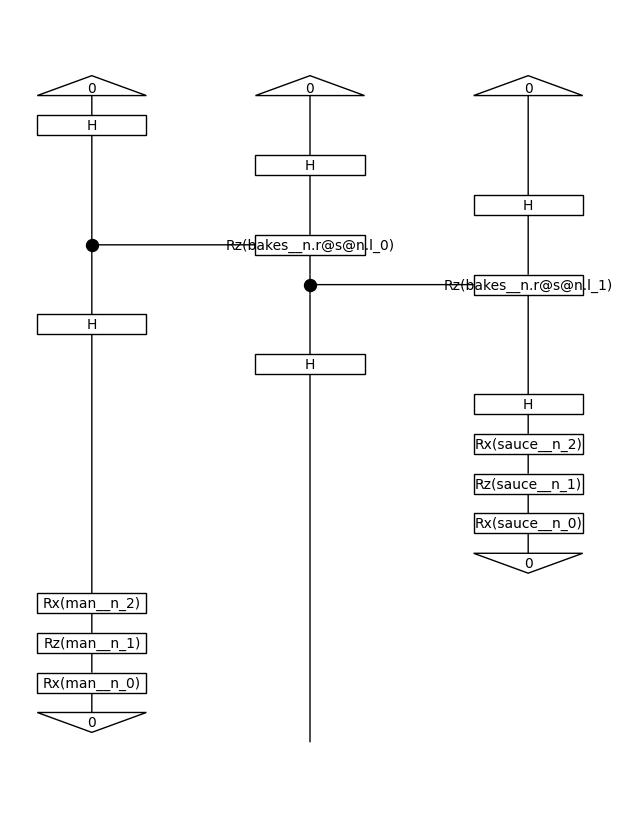

In [ ]:
ansatz = IQPAnsatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1},
                   n_layers=1, n_single_qubit_params=3)

train_circuits = [ansatz(diagram) for diagram in train_diagrams]
dev_circuits =  [ansatz(diagram) for diagram in dev_diagrams]
test_circuits = [ansatz(diagram) for diagram in test_diagrams]

train_circuits[0].draw(figsize=(6, 8))

In [ ]:
from torch import nn
from lambeq import PennyLaneModel

# inherit from PennyLaneModel to use the PennyLane circuit evaluation
class XORSentenceModel(PennyLaneModel):
    def __init__(self, **kwargs):
        PennyLaneModel.__init__(self, **kwargs)

        self.xor_net = nn.Sequential(nn.Linear(4, 10),
                                     nn.ReLU(),
                                     nn.Linear(10, 1),
                                     nn.Sigmoid())

    def forward(self, diagram_pairs):
        first_d, second_d = zip(*diagram_pairs)
        # evaluate each circuit and concatenate the results
        evaluated_pairs = torch.cat((self.get_diagram_output(first_d),
                                     self.get_diagram_output(second_d)),
                                    dim=1)
        evaluated_pairs = 2 * (evaluated_pairs - 0.5)
        # pass the concatenated results through a simple neural network
        return self.xor_net(evaluated_pairs)

In [ ]:
def make_pair_data(diagrams):
    pair_diags = list(zip(diagrams[:len(diagrams)//2], diagrams[len(diagrams)//2:]))
    return pair_diags

train_pair_circuits = make_pair_data(train_circuits)
dev_pair_circuits = make_pair_data(dev_circuits)
test_pair_circuits = make_pair_data(test_circuits)

In [ ]:
from lambeq import Dataset

all_pair_circuits = (train_pair_circuits +
                     dev_pair_circuits +
                     test_pair_circuits)
a, b = zip(*all_pair_circuits)

# initialise our model by passing in the diagrams, so that we have trainable parameters for each token
model = XORSentenceModel.from_diagrams(a + b, probabilities=True, normalize=True)
model.initialise_weights()
model = model.double()

# initialise datasets and optimizers as in PyTorch
train_pair_dataset = Dataset(train_pair_circuits,
                             train_labels,
                             batch_size=BATCH_SIZE)

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [ ]:
def accuracy(circs, labels):
    predicted = model(circs)
    return (torch.round(torch.flatten(predicted)) ==
            torch.DoubleTensor(labels)).sum().item()/len(circs)

In [ ]:
best = {'acc': 0, 'epoch': 0}

for i in range(EPOCHS):
    epoch_loss = 0
    for circuits, labels in train_pair_dataset:
        optimizer.zero_grad()
        predicted = model(circuits)
        # use BCELoss as our outputs are probabilities, and labels are binary
        loss = torch.nn.functional.binary_cross_entropy(
            torch.flatten(predicted), torch.DoubleTensor(labels))
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()

    # evaluate on dev set every 5 epochs
    # save the model if it's the best so far
    # stop training if the model hasn't improved for 10 epochs
    if i % 5 == 0:
        dev_acc = accuracy(dev_pair_circuits, dev_labels)

        print('Epoch: {}'.format(i))
        print('Train loss: {}'.format(epoch_loss))
        print('Dev acc: {}'.format(dev_acc))

        if dev_acc > best['acc']:
            best['acc'] = dev_acc
            best['epoch'] = i
            model.save('xor_model.lt')
        elif i - best['epoch'] >= 10:
            print('Early stopping')
            break

# load the best performing iteration of the model on the dev set
if best['acc'] > accuracy(dev_pair_circuits, dev_labels):
    model.load('xor_model.lt')
    model = model.double()

Epoch: 0
Train loss: 5.059156801809347
Dev acc: 0.555
Epoch: 5
Train loss: 4.614814246413707
Dev acc: 0.655
Epoch: 10
Train loss: 1.7982970168966081
Dev acc: 0.925
Epoch: 15
Train loss: 4.143533598928245
Dev acc: 0.765
Epoch: 20
Train loss: 0.8018226302714526
Dev acc: 0.76
Early stopping
